In [1]:
# importing utilities
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from IPython.display import Image, HTML

# importing pytorch libraries
import torch
from torch import nn
from torch import autograd
from torch.utils.data import DataLoader

# importing data science libraries
import pandas as pd
import random as rd
import numpy as np
from sklearn.model_selection import train_test_split


from datetime import datetime
import os
import sys
from datetime import datetime

In [2]:
data= pd.read_csv("Three Meter/data.csv")

In [3]:
data

,4.7547,4.5561,4.5738,4.5007,4.4813,4.5559,4.4415,4.4804,4.6223,4.4574,...,4.6228,4.6313,4.6563,4.5482,4.5666,4.665,4.6196,4.6131,4.3299,4.7383
0,4.7554,4.5558,4.5731,4.5003,4.4826,4.5563,4.4418,4.4799,4.6216,4.4566,...,4.6222,4.6309,4.6562,4.5479,4.5661,4.6658,4.6199,4.6126,4.3295,4.7412
1,4.7565,4.5551,4.5728,4.4999,4.4842,4.5569,4.4417,4.4788,4.6208,4.4562,...,4.6215,4.6305,4.6550,4.5467,4.5655,4.6664,4.6196,4.6116,4.3287,4.7439
2,4.7574,4.5545,4.5724,4.4997,4.4849,4.5566,4.4409,4.4781,4.6201,4.4556,...,4.6199,4.6299,4.6537,4.5458,4.5645,4.6670,4.6191,4.6101,4.3271,4.7464
3,4.7582,4.5546,4.5718,4.4991,4.4863,4.5580,4.4410,4.4776,4.6194,4.4553,...,4.6187,4.6305,4.6532,4.5455,4.5637,4.6670,4.6185,4.6083,4.3257,4.7482
4,4.7590,4.5545,4.5713,4.4985,4.4874,4.5583,4.4411,4.4776,4.6190,4.4548,...,4.6181,4.6308,4.6526,4.5450,4.5632,4.6678,4.6181,4.6068,4.3243,4.7489
5,4.7598,4.5549,4.5709,4.4981,4.4881,4.5583,4.4415,4.4773,4.6184,4.4547,...,4.6170,4.6309,4.6526,4.5447,4.5627,4.6685,4.6184,4.6056,4.3230,4.7490
6,4.7606,4.5558,4.5707,4.4973,4.4883,4.5582,4.4419,4.4766,4.6181,4.4538,...,4.6154,4.6301,4.6517,4.5436,4.5617,4.6687,4.6184,4.6043,4.3216,4.7487
7,4.7616,4.5565,4.5704,4.4968,4.4889,4.5582,4.4421,4.4762,4.6180,4.4537,...,4.6149,4.6296,4.6513,4.5434,4.5615,4.6694,4.6184,4.6034,4.3209,4.7485
8,4.7624,4.5575,4.5699,4.4967,4.4897,4.5590,4.4428,4.4764,4.6177,4.4532,...,4.6145,4.6292,4.6512,4.5427,4.5608,4.6700,4.6186,4.6025,4.3204,4.7475
9,4.7633,4.5586,4.5692,4.4965,4.4903,4.5594,4.4436,4.4768,4.6172,4.4530,...,4.6140,4.6285,4.6512,4.5417,4.5602,4.6707,4.6193,4.6025,4.3203,4.7466


In [4]:
data.shape


(139201, 33)

In [5]:
train_data, test_data = train_test_split(data,test_size=0.15)

In [6]:
training_set = np.array(train_data, dtype = 'float')
testing_set = np.array(test_data, dtype = 'float')

In [7]:

training_set = torch.FloatTensor(training_set)
test_set = torch.FloatTensor(testing_set)


In [21]:

# Creating the architecture of the Neural Network
class SAE(nn.Module):
    def __init__(self, ):
        super(SAE, self).__init__()
        self.fc1 = nn.Linear(33, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 32)
        self.fc4 = nn.Linear(32, 33)
        self.activation = nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.8)
    def forward(self, x):
        x = self.dropout(self.activation(self.fc1(x)))
        x = self.dropout(self.activation(self.fc2(x)))
        x = self.dropout(self.activation(self.fc3(x)))
        x = self.fc4(x)
        return x

In [24]:
nb_epoch=200
batch_size=1000
sae = SAE()
criterion = nn.MSELoss()
optimizer = torch.optim.RMSprop(sae.parameters(), lr = 0.01, weight_decay = 0.5)

In [25]:
N,D = training_set.shape
# Training the SAE
train_loss = []

dataloader = DataLoader(training_set, batch_size=batch_size, shuffle=True, num_workers=0)
for epoch in range(1, nb_epoch + 1):
    losses=0
    
    s = 0.
    for data in dataloader:
        input = autograd.Variable(data)
        target = input.clone()
        if torch.sum(target.data > 0) > 0:
            output = sae(input)
            target.require_grad = False
            output[target == 0] = 0
            loss = criterion(output, target)
            mean_corrector = D/float(torch.sum(target.data > 0) + 1e-10)
            loss.backward()
            losses += np.sqrt(loss.data[0]*mean_corrector)
            s += 1.
            optimizer.step()
    train_loss.append(losses)
    if(epoch%5==0):
        print('epoch: '+str(epoch)+' loss: '+str(losses))
        


/home/manas/.local/share/virtualenvs/virtual-py3/lib/python3.5/site-packages/ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


epoch: 5 loss: tensor(0.6240)
epoch: 10 loss: tensor(0.1324)
epoch: 15 loss: tensor(0.1405)
epoch: 20 loss: tensor(0.1341)
epoch: 25 loss: tensor(0.1287)
epoch: 30 loss: tensor(0.1226)
epoch: 35 loss: tensor(0.1175)
epoch: 40 loss: tensor(0.1125)
epoch: 45 loss: tensor(0.1083)
epoch: 50 loss: tensor(0.1040)
epoch: 55 loss: tensor(0.1004)
epoch: 60 loss: tensor(0.0969)
epoch: 65 loss: tensor(0.0937)
epoch: 70 loss: tensor(0.0909)
epoch: 75 loss: tensor(0.0879)
epoch: 80 loss: tensor(0.0856)
epoch: 85 loss: tensor(0.0834)
epoch: 90 loss: tensor(0.0813)
epoch: 95 loss: tensor(0.0794)
epoch: 100 loss: tensor(0.0779)
epoch: 105 loss: tensor(0.0765)
epoch: 110 loss: tensor(0.0750)
epoch: 115 loss: tensor(0.0739)
epoch: 120 loss: tensor(0.0728)
epoch: 125 loss: tensor(0.0717)
epoch: 130 loss: tensor(0.0708)
epoch: 135 loss: tensor(0.0701)
epoch: 140 loss: tensor(0.0694)
epoch: 145 loss: tensor(0.0686)
epoch: 150 loss: tensor(0.0681)
epoch: 155 loss: tensor(0.0674)
epoch: 160 loss: tensor(0.06

Text(0.5, 1.0, 'Autoencoder training performance')

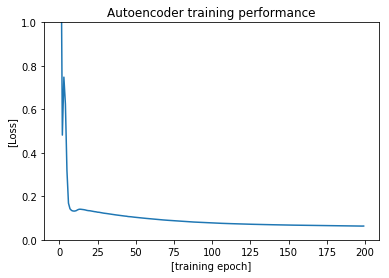

In [29]:
# plot the training progress
plt.plot(range(0, len(train_loss)), train_loss)
plt.xlabel('[training epoch]')
# plt.xlim([0, len(train_loss)])
plt.ylabel('[Loss]')
plt.ylim([0.0, 1.0])
plt.title('Autoencoder training performance')

In [30]:

#     # Testing the SAE\
# for epoch in range(1, nb_epoch + 1):
#     test_loss = 0
#     s = 0.
#     for data in dataloader:
#         input = autograd.Variable(data)
#         target = autograd.Variable(test_set)
#         if torch.sum(target.data > 0) > 0:
#             output = sae(input)
#             target.require_grad = False
#             output[target == 0] = 0
#             loss = criterion(output, target)
#             mean_corrector = D/float(torch.sum(target.data > 0) + 1e-10)
#             test_loss += np.sqrt(loss.data[0]*mean_corrector)
#             s += 1.
#     print('test loss: '+str(test_loss/s))
    
    
    
testloss=[]

# Testing the SAE
for epoch in range(1, nb_epoch + 1):
    test_loss = 0
    s = 0.
    for i in range(D):
        input = autograd.Variable(training_set[i])
        target = autograd.Variable(test_set[i])
        if torch.sum(target.data > 0) > 0:
            output = sae(input)
            target.require_grad = False
            output[target == 0] = 0
            loss = criterion(output, target)
            mean_corrector = D/float(torch.sum(target.data > 0) + 1e-10)
            test_loss += np.sqrt(loss.data[0]*mean_corrector)
            s += 1.
    testloss.append(test_loss)
    if(epoch%5==0):
        print('epoch: '+str(epoch)+' loss: '+str(test_loss))

/home/manas/.local/share/virtualenvs/virtual-py3/lib/python3.5/site-packages/ipykernel_launcher.py:36: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


epoch: 5 loss: tensor(0.5425)
epoch: 10 loss: tensor(0.5176)
epoch: 15 loss: tensor(0.5492)
epoch: 20 loss: tensor(0.4796)
epoch: 25 loss: tensor(0.5276)
epoch: 30 loss: tensor(0.5344)
epoch: 35 loss: tensor(0.5255)
epoch: 40 loss: tensor(0.5255)
epoch: 45 loss: tensor(0.5405)
epoch: 50 loss: tensor(0.5475)
epoch: 55 loss: tensor(0.5328)
epoch: 60 loss: tensor(0.5013)
epoch: 65 loss: tensor(0.5236)
epoch: 70 loss: tensor(0.4970)
epoch: 75 loss: tensor(0.5006)
epoch: 80 loss: tensor(0.5158)
epoch: 85 loss: tensor(0.5390)
epoch: 90 loss: tensor(0.5138)
epoch: 95 loss: tensor(0.5157)
epoch: 100 loss: tensor(0.5409)
epoch: 105 loss: tensor(0.5722)
epoch: 110 loss: tensor(0.5486)
epoch: 115 loss: tensor(0.5451)
epoch: 120 loss: tensor(0.4883)
epoch: 125 loss: tensor(0.5203)
epoch: 130 loss: tensor(0.5270)
epoch: 135 loss: tensor(0.5389)
epoch: 140 loss: tensor(0.5386)
epoch: 145 loss: tensor(0.5110)
epoch: 150 loss: tensor(0.4869)
epoch: 155 loss: tensor(0.5104)
epoch: 160 loss: tensor(0.52

Text(0.5, 1.0, 'Autoencoder testing performance')

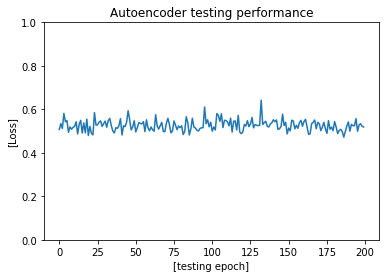

In [33]:
# plot the training progress
plt.plot(range(0, len(testloss)), testloss)
plt.xlabel('[testing epoch]')
# plt.xlim([0, len(train_loss)])
plt.ylabel('[Loss]')
plt.ylim([0.0, 1.0])
plt.title('Autoencoder testing performance')